<a href="https://colab.research.google.com/github/AfraHossain/CSE303_Sec3_Group1/blob/main/VGG_16_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import random
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
import torch.nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from torchvision import models 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix


In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "CPU")
print(device)

cuda


In [ ]:
num_epochs = 5
batch_size = 10
learning_rate = 0.001

In [ ]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),     
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])

train_set = datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
test_set = datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print('Training set samples:', len(train_set))
print('Test set samples:', len(test_set))

Training set samples: 50000
Test set samples: 10000


In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 10, shuffle=False)
print(len(train_loader))
print(len(test_loader))

5000
1000


In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
#print(images[1])
print(images.shape) 
print(labels.shape)

torch.Size([10, 3, 224, 224])
torch.Size([10])


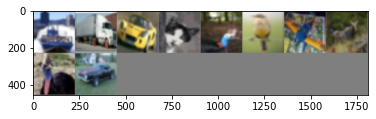

In [ ]:
# show images
imshow(torchvision.utils.make_grid(images))


In [ ]:
vgg16 = models.vgg16(pretrained = True)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
class ConvNet(torch.nn.Module):

    def __init__(self,):
        super(ConvNet, self).__init__()
        
        self.block_1 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=3,
                                out_channels=64,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=64,
                                out_channels=64,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )
        
        self.block_2 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=64,
                                out_channels=128,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=128,
                                out_channels=128,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )
        
        self.block_3 = torch.nn.Sequential(        
                torch.nn.Conv2d(in_channels=128,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=256,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),        
                torch.nn.Conv2d(in_channels=256,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )
        
          
        self.block_4 = torch.nn.Sequential(   
                torch.nn.Conv2d(in_channels=256,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),        
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),        
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),            
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )
        
        self.block_5 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),            
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),            
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),    
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))             
        )
        
       
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(25088, 512),
            torch.nn.ReLU(True),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(512, 128),
            torch.nn.ReLU(True),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(128, 10),
        )
            
    
        
        
    def forward(self, x):

        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.block_5(x)
        # x = self.avgpool(x)
        x = x.view(x.size(0), -1) # flatten
        
        logits = self.classifier(x)
        #probas = F.softmax(logits, dim=1)

        return logits

In [ ]:
model = ConvNet().to(device)
# print(model)

In [ ]:
optimizer = optim.SGD(model.classifier.parameters(), lr=0.01)
criterion= torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(train_loader):
        
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = model(imgs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        # optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 200 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')


Epoch [1/5], Step [200/5000], Loss: 2.2938
Epoch [1/5], Step [400/5000], Loss: 2.3076
Epoch [1/5], Step [600/5000], Loss: 2.2843
Epoch [1/5], Step [800/5000], Loss: 2.3079
Epoch [1/5], Step [1000/5000], Loss: 2.2947
Epoch [1/5], Step [1200/5000], Loss: 2.3170
Epoch [1/5], Step [1400/5000], Loss: 2.3014
Epoch [1/5], Step [1600/5000], Loss: 2.2989
Epoch [1/5], Step [1800/5000], Loss: 2.3056
Epoch [1/5], Step [2000/5000], Loss: 2.3053
Epoch [1/5], Step [2200/5000], Loss: 2.3073
Epoch [1/5], Step [2400/5000], Loss: 2.2999
Epoch [1/5], Step [2600/5000], Loss: 2.3086
Epoch [1/5], Step [2800/5000], Loss: 2.3086
Epoch [1/5], Step [3000/5000], Loss: 2.3139
Epoch [1/5], Step [3200/5000], Loss: 2.2865
Epoch [1/5], Step [3400/5000], Loss: 2.2966
Epoch [1/5], Step [3600/5000], Loss: 2.2990
Epoch [1/5], Step [3800/5000], Loss: 2.3071
Epoch [1/5], Step [4000/5000], Loss: 2.2959
Epoch [1/5], Step [4200/5000], Loss: 2.3056
Epoch [1/5], Step [4400/5000], Loss: 2.3057
Epoch [1/5], Step [4600/5000], Loss:

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 1000.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 1000.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')            

Accuracy of the network: 100.3 %
Accuracy of plane: 0.0 %
Accuracy of car: 0.0 %
Accuracy of bird: 0.0 %
Accuracy of cat: 0.0 %
Accuracy of deer: 0.0 %
Accuracy of dog: 997.0 %
Accuracy of frog: 0.0 %
Accuracy of horse: 0.0 %
Accuracy of ship: 6.0 %
Accuracy of truck: 0.0 %
